![imagen](./attack%20on%20titan.jpg)

## ANALISIS EXPLORATORIO - LA POPULARIDAD DEL ANIME 

### TEMA

El objetivo de este EDA es entender mejor lo que resuena con la audiencia y contribuye a la popularidad en el mundo del anime

### HIPÓTESIS

1.¿Que series de animes tienen mas popularidad?

2.¿Que genero de anime es el mas popular?

3.¿La popularidad del anime podría estar relacionada con el estudio de animacion?

4.¿Los animes cortos tienen mas popularidad que los animes largos?

5.¿Que estudios de animacion son los mas populares?

6.¿Cuantos animes han sido cancelados y cuantos han sido finalizados?

7.¿Que pelicula de Studio Ghibli tiene mas popularidad?

8.¿Cuantos animes han sido premiados?

9.¿Que peliculas de anime son las mas populares?

## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

**LINK de la base de datos que voy a usar en este EDA:**
>[KAGGLE- ANIME](https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020)

>[KAGGLE- ANIME2](https://www.kaggle.com/datasets/vishalmane10/anime-dataset-2022)

>[Myanimelist API](https://myanimelist.net/apiconfig)

>[Kitsu API](https://kitsu.docs.apiary.io/#)

>[Anilist API](https://anilist.gitbook.io/anilist-apiv2-docs/)

>[RapidAPI](https://rapidapi.com/search/anime)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# Primer manejo de datos

In [72]:
anime = pd.read_csv("./anime.csv")
anime.head()

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",...,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",...,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108


## Que significa el nombre de cada columna

| <!-- -->      | <!-- -->        |
|:-------------:|:---------------:|
| **Name**| *Nombre del anime*|
| **Score** | *Puntuación media del anime* |
| **Genres** | *Generos del anime* |
| **Type** | *Tipo de anime. serie, película u OVA* |
| **Episodes** | *Episodios del anime* |
| **Aired** | *Rango de fechas en que se emitió el anime* |
| **Premiered** | *La temporada y año en que se estrenó el anime* |
| **Producers** | *Las productoras o estudios de los animes* |
| **Licensors** | *Las empresas que poseen la licencia para distribuir el anime* |
| **Studios** | *Los estudios de animación de los animes* |
| **Source** | *La fuente del anime. Manga, novela u original* |
| **Duration** | *La duración de cada episodio* |
| **Rating** | *La calificación del anime* |
| **Ranked** | *La posición en el ranking del anime según la popularidad o las calificaciones* |
| **Popularity** | *la popularidad del anime* |
| **Members** | *La cantidad de personas que tienen el anime en su lista* |
| **Favorites** | *La cantidad de personas que han marcado el anime como favorito* |
| **Watching** | *La cantidad de personas que actualmente ven el anime* |
| **Completed** | *La cantidad de personas que han completado la visualización del anime.* |
| **Dropped** | *La cantidad de usuarios que han abandonado el anime* |


## Info general

In [73]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       14952 non-null  int64  
 1   Name           14952 non-null  object 
 2   Score          14952 non-null  float64
 3   Genres         14952 non-null  object 
 4   English name   14952 non-null  object 
 5   Japanese name  14952 non-null  object 
 6   sypnopsis      13602 non-null  object 
 7   Type           14952 non-null  object 
 8   Episodes       14952 non-null  object 
 9   Aired          14952 non-null  object 
 10  Premiered      14952 non-null  object 
 11  Producers      14952 non-null  object 
 12  Licensors      14952 non-null  object 
 13  Studios        14952 non-null  object 
 14  Source         14952 non-null  object 
 15  Duration       14952 non-null  object 
 16  Rating         14952 non-null  object 
 17  Ranked         13231 non-null  float64
 18  Popula

In [74]:
anime.describe()

,anime_id,Score,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
count,14952.000000,14952.000000,13231.000000,14952.000000,1.495200e+04,14952.000000,14952.000000,1.495200e+04,14952.000000,14952.000000
mean,19017.432718,6.511526,6829.853828,7465.970907,4.068648e+04,537.629882,2619.806715,2.594310e+04,1121.307986,1377.861891
std,14588.758618,0.807185,4168.929475,4313.169381,1.348744e+05,4399.016449,15190.098642,9.812729e+04,4613.759597,5110.874501
min,1.000000,1.850000,1.000000,1.000000,2.000000e+02,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,4602.500000,6.080000,3309.500000,3732.000000,7.360000e+02,1.000000,27.000000,2.460000e+02,14.000000,48.000000
50%,16729.000000,6.510000,6618.000000,7466.500000,3.493500e+03,6.000000,127.000000,1.515500e+03,78.000000,102.000000
75%,33513.250000,7.010000,9942.000000,11194.000000,1.919325e+04,47.000000,723.000000,9.797000e+03,388.250000,377.000000
max,48492.000000,9.190000,15780.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000


- Tipos de datos

In [75]:
anime.dtypes

anime_id           int64
Name              object
Score            float64
Genres            object
English name      object
Japanese name     object
sypnopsis         object
Type              object
Episodes          object
Aired             object
Premiered         object
Producers         object
Licensors         object
Studios           object
Source            object
Duration          object
Rating            object
Ranked           float64
Popularity         int64
Members            int64
Favorites          int64
Watching           int64
Completed          int64
On-Hold            int64
Dropped            int64
dtype: object

In [76]:
anime.dtypes.value_counts()

object     15
int64       8
float64     2
Name: count, dtype: int64

- Cuantas filas y columnas

In [77]:
anime.shape

(14952, 25)

## Limpieza de la base de datos

- Ver si tengo valores nulos

In [78]:
anime.isna().any()

anime_id         False
Name             False
Score            False
Genres           False
English name     False
Japanese name    False
sypnopsis         True
Type             False
Episodes         False
Aired            False
Premiered        False
Producers        False
Licensors        False
Studios          False
Source           False
Duration         False
Rating           False
Ranked            True
Popularity       False
Members          False
Favorites        False
Watching         False
Completed        False
On-Hold          False
Dropped          False
dtype: bool

- Ver cuantos valores nulos tengo

In [79]:
anime.isnull().sum()

anime_id            0
Name                0
Score               0
Genres              0
English name        0
Japanese name       0
sypnopsis        1350
Type                0
Episodes            0
Aired               0
Premiered           0
Producers           0
Licensors           0
Studios             0
Source              0
Duration            0
Rating              0
Ranked           1721
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
dtype: int64

- Cuantos valores nulos tengo en total

In [80]:
anime.isnull().sum().sum()

3071

- Ver la proporcion de valores nulos

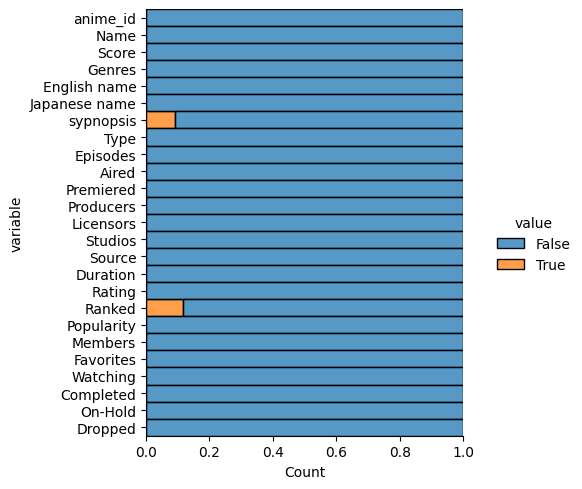

In [81]:
anime.isnull().melt().pipe(lambda df:(sns.displot(data = df, y="variable", hue = "value",multiple = "fill")));

- Cuantos valores duplicados tengo en la columna Name

In [82]:
anime["Name"].duplicated().sum()

3

- Encontrar filas duplicadas en la columna Name

In [83]:
dupli= anime[anime.duplicated(subset='Name', keep=False)]
dupli[['Name']]

,Name
11880,Hinamatsuri
12365,Hinamatsuri
14123,Maou Gakuin no Futekigousha: Shijou Saikyou no...
14937,Maou Gakuin no Futekigousha: Shijou Saikyou no...
14938,Maou Gakuin no Futekigousha: Shijou Saikyou no...


- Hacer una copia

In [84]:
anime_copia = anime.copy()

- Borrar duplicados de la columna Name

In [85]:
anime_copia = anime_copia.drop_duplicates(subset='Name', keep='first')

anime_copia.head(1)

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678


In [86]:
anime_copia["Name"].duplicated().sum()

0

- Eliminar columnas que no me interesan

In [87]:
anime_copia.drop("Japanese name", axis=1, inplace=True)

In [88]:
anime_copia.drop("English name", axis=1, inplace=True)

In [89]:
anime_copia.drop("sypnopsis", axis=1, inplace=True)

In [90]:
anime_copia.drop("On-Hold", axis=1, inplace=True)

In [91]:
anime_copia.drop("anime_id", axis=1, inplace=True)

In [92]:
anime_copia.head(5)

,Name,Score,Genres,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,Dropped
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,26678
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,770
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,13925
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5378
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,1108


- Eliminar filas con nan

In [93]:
anime_filter = anime_copia.dropna(subset=["Ranked"])

In [94]:
anime_filter.shape

(13230, 20)

In [97]:
anime_filter.isnull().sum().sum()

0

- Guardar csv sin Nan

In [96]:
ruta = "./anime-filtered.csv"
anime_filter.to_csv(ruta, index=False, encoding='utf-8')